# Project 1 Data Analysis

The extent of analysis of a dataset is largely up to the analyst. There is much subjectivity when deciding how to explore a dataset. How much is too much exploration, to a point where you are not getting any information from some charts? What if you do not explore enough, will you miss key patterns and correlations between variables?

For Project 1 exploration, since we are relatively new to analyzing your data, I will give you exactly what I need from your analysis. If you do the minimum exploration I have listed here, then you will get a 87%-90% on this portion of the project. If you add more insightful analysis on your own, you will get an A.

We are utilizing two datasets for our analysis:
1. [Air Traffic Passenger Statistics](https://data.sfgov.org/Transportation/Air-Traffic-Passenger-Statistics/rkru-6vcg/about_data)
2. [Air Traffic Landing Statistics](https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t/about_data)

## **Exploring Air Traffic Passenger Patterns**

## Basics of Dataset

In [5]:
#Find the size of your dataset (number of features and observations)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Air_Traffic_Passenger_Statistics_20240131.csv')
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM


In [6]:
# Get the number of rows and columns in the DataFrame
num_rows, num_columns = df.shape

# Display the size of the dataset
print(f"Number of observations (rows): {num_rows}")
print(f"Number of features (columns): {num_columns}")


Number of observations (rows): 35172
Number of features (columns): 15


In [7]:
from IPython.display import display

# Summary statistics for numeric columns
numeric_summary = df.describe()

# Summary statistics for categorical columns
categorical_summary = df.describe(include='object')

print("Numeric Summary:")
display(numeric_summary)

print("\nCategorical Summary:")
display(categorical_summary)

Numeric Summary:


,Activity Period,Passenger Count
count,35172.000000,35172.000000
mean,201173.280792,28000.508075
std,706.637527,62772.762446
min,199907.000000,0.000000
25%,200603.000000,4452.000000
50%,201206.000000,8634.000000
75%,201804.000000,19893.750000
max,202311.000000,856501.000000



Categorical Summary:


,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,data_as_of,data_loaded_at
count,35172,35172,34856,35172,34856,35172,35172,35172,35172,35172,35172,35172,35172
unique,293,134,111,121,100,2,9,3,2,5,8,2,1
top,2018/06/01,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,US,Enplaned,Other,International,A,2023/12/21 12:05:28 AM,2024/01/20 07:02:35 AM
freq,170,3670,7095,4317,8339,22620,12552,16629,31348,21714,12063,33261,35172


In [8]:
df.isnull().sum()

Activity Period                  0
Activity Period Start Date       0
Operating Airline                0
Operating Airline IATA Code    316
Published Airline                0
Published Airline IATA Code    316
GEO Summary                      0
GEO Region                       0
Activity Type Code               0
Price Category Code              0
Terminal                         0
Boarding Area                    0
Passenger Count                  0
data_as_of                       0
data_loaded_at                   0
dtype: int64

The columns "Operating Airline IATA Code" and "Published Airline IATA Code" have missing values, but we won't be using these features in our analysis, hence we can ignore those missing values.

## Distribution of Dataset

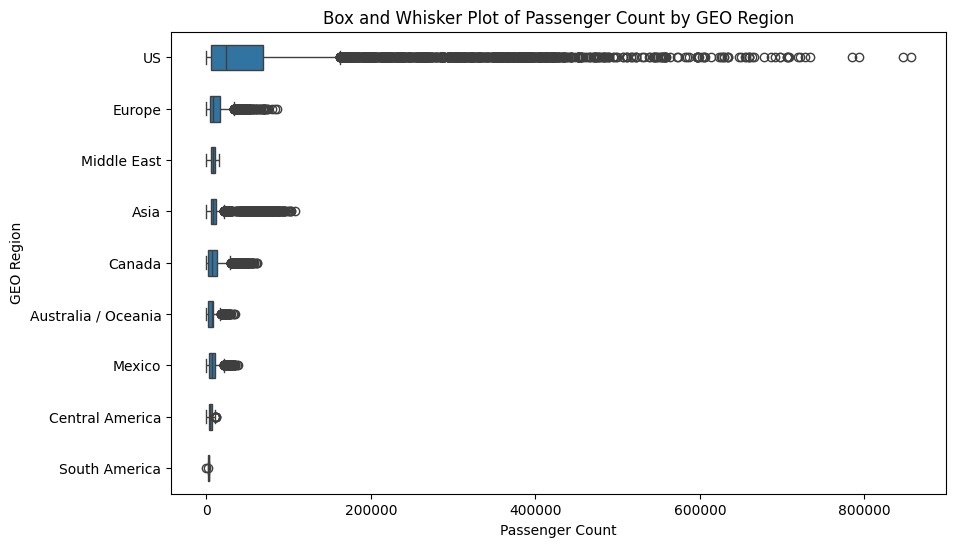

In [9]:
#Add at least one box and whisker plot of an important numerical variable in your table

median_order = df.groupby('GEO Region')['Passenger Count'].median().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Passenger Count', y='GEO Region', order=median_order, data=df, width=0.5)

plt.title('Box and Whisker Plot of Passenger Count by GEO Region')
plt.show()


**Observations:**


1.   The number of passengers arriving from or departing to the United States is significantly higher than the number of passengers from any other region.
2.   The number of passengers from Europe is the second highest, followed by Asia, Canada, and Mexico.
3.    The number of passengers from Central America and South America is the lowest.




<ipython-input-10-60df8f04d2bb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


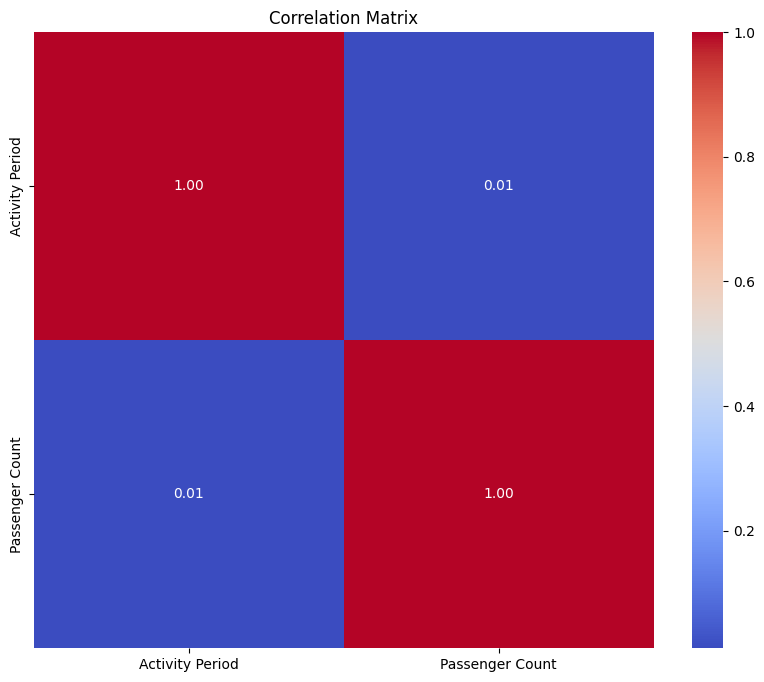

In [10]:
#Add a correlation matrix of all your numerical variables and give written
#anlaysis of any variables that show strong correlation

# Creating a correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Interpretation:**

We can see that correlation coefficient between passenger count and activity period is 0.01, suggesting that there is little to no linear relationship between passenger count and activity period.

In [11]:
# Converting the 'Activity Period' column to datetime format
df.loc[:,"Activity Period"] = pd.to_datetime(df.loc[:,"Activity Period"].astype(str), format="%Y%m")

# Extracting the year from the 'Activity Period'
df.loc[:,"Year"] = df["Activity Period"].dt.year

# Extracting the month from the 'Activity Period'
df.loc[:,"Month"] = df["Activity Period"].dt.month

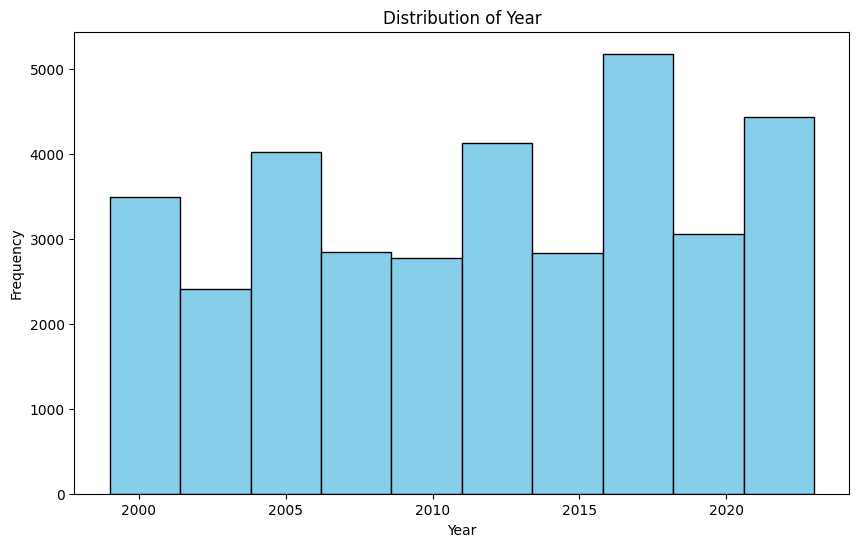

In [12]:
#BONUS: You can create a histogram to show distribution of a numerical variable

plt.figure(figsize=(10, 6))
plt.hist(df['Year'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year')

plt.show()

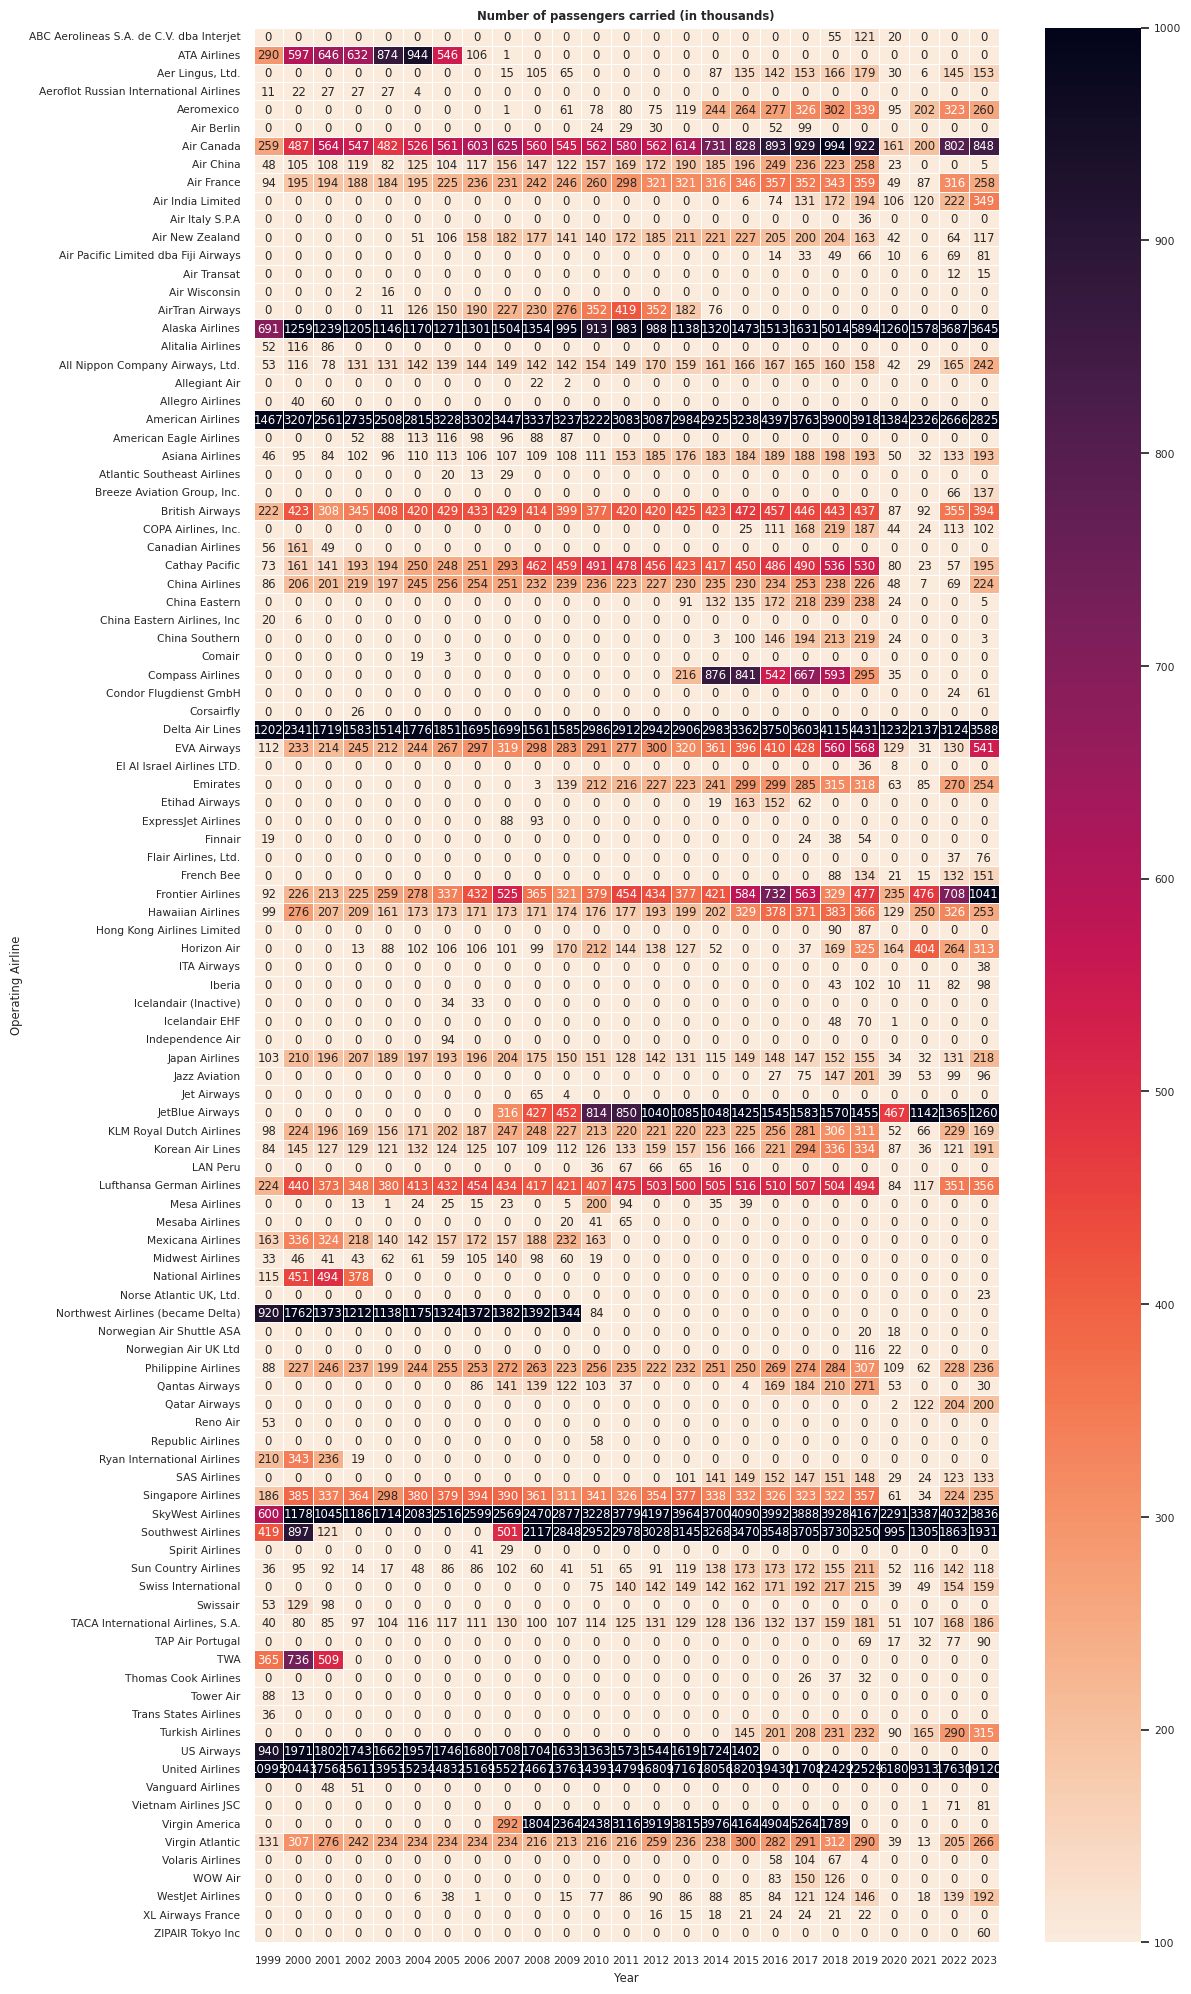

In [13]:
#BONUS: Include any other charts we learned in class on 01/30


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and summing passenger counts
passenger_airline_year = df.groupby(["Year", "Operating Airline"])["Passenger Count"].sum().divide(1000)
passenger_airline_year = passenger_airline_year.reset_index()

# Creating a pivot table
pivot_table_passenger = passenger_airline_year.pivot_table(values="Passenger Count", index="Operating Airline", columns="Year", fill_value=0)

# Combining rows for United Airlines
pivot_table_passenger.loc["United Airlines", :] = pivot_table_passenger.loc["United Airlines", :] + pivot_table_passenger.loc["United Airlines - Pre 07/01/2013", :]
pivot_table_passenger.drop("United Airlines - Pre 07/01/2013", axis=0, inplace=True)

# Dropping the small airlines
smallest_airlines = pivot_table_passenger[pivot_table_passenger.sum(axis=1) < 13]
pivot_table_passenger = pivot_table_passenger.drop(smallest_airlines.index, axis=0)

sns.set(font_scale=0.7)

# Creating a heatmap
fig1 = plt.figure(figsize=(12, 20))
heatmap_passenger = sns.heatmap(pivot_table_passenger, annot=True, linewidths=.5, vmin=100, vmax=1000, fmt='.0f', cmap=sns.cm.rocket_r)
heatmap_passenger.set_title("Number of passengers carried (in thousands)", fontweight="bold")
heatmap_passenger.set_yticklabels(heatmap_passenger.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()


The above heatmap shows what amount of traffic various airlines generated through the years (in thousands).

In [14]:
average_passengers_per_airline = pivot_table_passenger.mean(axis=1)
top_5_airlines = average_passengers_per_airline.nlargest(5).to_frame().mul(1000).astype("int64")
top_5_airlines.columns = ["Mean no. of passengers per year"]
total_passengers = top_5_airlines.loc[:, "Mean no. of passengers per year"].sum()
top_5_airlines.loc[:, "Share [%]"] = top_5_airlines.loc[:, "Mean no. of passengers per year"].div(total_passengers).mul(100).round(1)

top_5_airlines

,Mean no. of passengers per year,Share [%]
Operating Airline,,
United Airlines,16221060,61.2
American Airlines,3022542,11.4
SkyWest Airlines,2932604,11.1
Delta Air Lines,2503895,9.4
Southwest Airlines,1842872,6.9


**Observations:**

From the above heatmap and table, the top 5 airlines which generated the highest passenger traffic are:

1.   United Airlines
2.   Amercian Airlines
3. SkyWest Airlines
4.  Delta Air Lines
5. Southwest Airlines






## Aggregation of Categorical Data

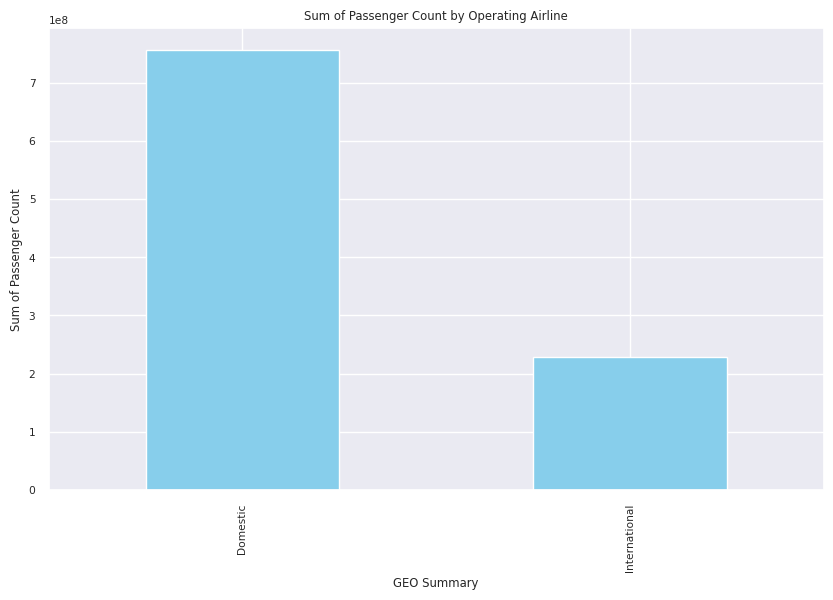

In [15]:
#Create either a bar chart or pie chart of the sum of one numerical value in
#relation to one categorical variable (i.e. sum of sales for each category of product)

grouped_data = df.groupby('GEO Summary')['Passenger Count'].sum()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Sum of Passenger Count by Operating Airline')
plt.xlabel('GEO Summary')
plt.ylabel('Sum of Passenger Count')
plt.show()


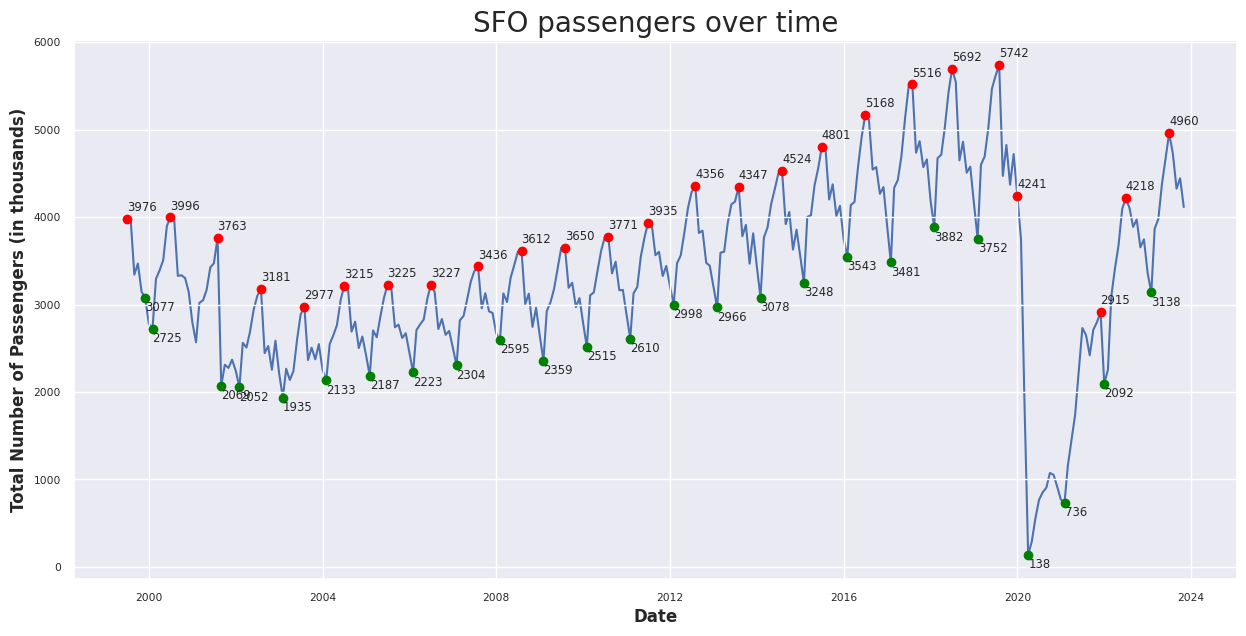

In [16]:
#BONUS: Include any other charts we learned in class on 01/30

PAX_yr = df.groupby(["Activity Period"])["Passenger Count"].sum().divide(1000)

fig, ax = plt.subplots(figsize=(15,7))

#Plotting the main PAX line
sns.lineplot(x=PAX_yr.index, y=PAX_yr.values, markers=True, ax=ax,zorder=0)

# Looking for maximum PAX for each year
PAX_yr_maxs = PAX_yr.groupby(PAX_yr.index.year).max()
PAX_yr_max_complete = PAX_yr[PAX_yr.isin(PAX_yr_maxs.values)].to_frame()

# Marking points of interest
plt.scatter(PAX_yr_max_complete.index, PAX_yr_max_complete.values, color = "red", zorder=2)

#Annotating each marker
for t,v in PAX_yr_max_complete.reset_index().values:
    ax.text(t,v+90,int(v))

# Looking for minimum PAX for each year
PAX_yr_mins = PAX_yr.groupby(PAX_yr.index.year).min()
PAX_yr_min_complete = PAX_yr[PAX_yr.isin(PAX_yr_mins.values)].to_frame()
plt.scatter(PAX_yr_min_complete.index, PAX_yr_min_complete.values, color = "green", zorder=2)
for t,v in PAX_yr_min_complete.reset_index().values:
    ax.text(t,v-150,int(v))

plt.title("SFO passengers over time", size = 20)
plt.xlabel("Date", fontweight="bold", size = 12)
plt.ylabel("Total Number of Passengers (in thousands)", fontweight="bold", size = 12)
plt.show()

**Observations:**


1.   Passenger numbers have been steadily increasing over time. From 2000 to 2019, the number of passengers increased from around 2 million to around 5.7 million per month. This is likely due to a number of factors, such as the growing population of the San Francisco Bay Area, the increasing popularity of air travel, and the addition of new routes and airlines at SFO.

2.   The COVID-19 pandemic had a significant impact on passenger numbers. In 2020, the number of passengers at SFO dropped to around 138,000 per month. However, passenger numbers have been recovering since then, and they are now at around 4 million per month.

3. Passenger numbers are higher in the summer months and lower in the winter months. This is likely due to a number of factors, such as school holidays, summer vacations, and business travel patterns.



## **Analyzing Air Traffic Landings**

## Basics of Dataset

In [ ]:
#Find the size of your dataset (number of features and observations)

In [20]:
import pandas as pd
df=pd.read_csv("Air_Traffic_Landings_Statistics.csv")
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,727,200,4,618000,2023/12/21 12:05:26 AM,2024/01/20 07:03:22 AM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,NaN,78,15444000,2023/12/21 12:05:26 AM,2024/01/20 07:03:22 AM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,0,71,25418000,2023/12/21 12:05:26 AM,2024/01/20 07:03:22 AM
3,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,100,1,368000,2023/12/21 12:05:26 AM,2024/01/20 07:03:22 AM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Passenger,Wide Body,Boeing,767,0,9,2879955,2023/12/21 12:05:26 AM,2024/01/20 07:03:22 AM


In [21]:
total=df.size
size=df.shape
print("Total size of the Air traffic Landing statistics dataset:",total)
print("Total no of features:",size[0])
print("Total no of Observations:",size[1])

Total size of the Air traffic Landing statistics dataset: 698054
Total no of features: 41062
Total no of Observations: 17


In [22]:
#Add summary statistics of your dataset here

In [23]:
import pandas as pd

df['Activity Period Start Date'] = pd.to_datetime(df['Activity Period Start Date'])
print(df['Activity Period Start Date'].dtype)


datetime64[ns]


In [24]:
print("The summary statistics of Air traffic Landing :\n")
df.describe()

The summary statistics of Air traffic Landing :



,Activity Period,Landing Count,Total Landed Weight
count,41062.000000,41062.000000,4.106200e+04
mean,201140.001705,105.232088,1.823557e+07
std,716.110101,239.168516,2.874351e+07
min,199907.000000,1.000000,3.600000e+03
25%,200507.000000,13.000000,3.114325e+06
50%,201201.000000,30.000000,9.384952e+06
75%,201801.000000,82.000000,1.953000e+07
max,202311.000000,2979.000000,3.122460e+08


In [25]:
df.dtypes #check numerical data

Activity Period                         int64
Activity Period Start Date     datetime64[ns]
Operating Airline                      object
Operating Airline IATA Code            object
Published Airline                      object
Published Airline IATA Code            object
GEO Summary                            object
GEO Region                             object
Landing Aircraft Type                  object
Aircraft Body Type                     object
Aircraft Manufacturer                  object
Aircraft Model                         object
Aircraft Version                       object
Landing Count                           int64
Total Landed Weight                     int64
data_as_of                             object
data_loaded_at                         object
dtype: object

In [26]:
df.isnull().sum().reset_index(name = "Null values").set_index("index")

,Null values
index,
Activity Period,0
Activity Period Start Date,0
Operating Airline,0
Operating Airline IATA Code,556
Published Airline,0
Published Airline IATA Code,551
GEO Summary,0
GEO Region,0
Landing Aircraft Type,0


The columns "Operating Airline IATA Code","Published Airline IATA Code" and "Aircraft Version" have missing values, but we won't
be using these features in your analysis, hence we can ignore those missing values.

## Distribution of Dataset

In [ ]:
#Add at least one box and whisker plot of an important numerical variable in your table

**BOX PLOT 1:**

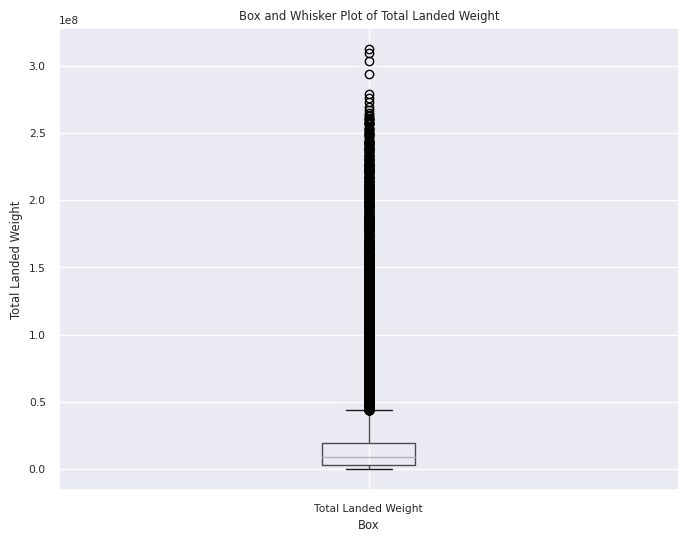

In [27]:
#To check box plot for the total landed Weight
import matplotlib.pyplot as plt

numerical_variable = "Total Landed Weight"

plt.figure(figsize=(8, 6))
df.boxplot(column=numerical_variable)
plt.title('Box and Whisker Plot of {}'.format(numerical_variable))
plt.ylabel('{}'.format(numerical_variable))
plt.xlabel('Box')
plt.show()


Based on the graph, we can see that the total landed weight of airplanes at SFO is right skewed. This means that there are more airplanes that land with a lower weight than there are airplanes that land with a higher weight. The median landed weight is around 15 million pounds. There are a few outliers, on the high end.

In [ ]:
#Add a correlation matrix of all your numerical variables and give written
#anlaysis of any variables that show strong correlation

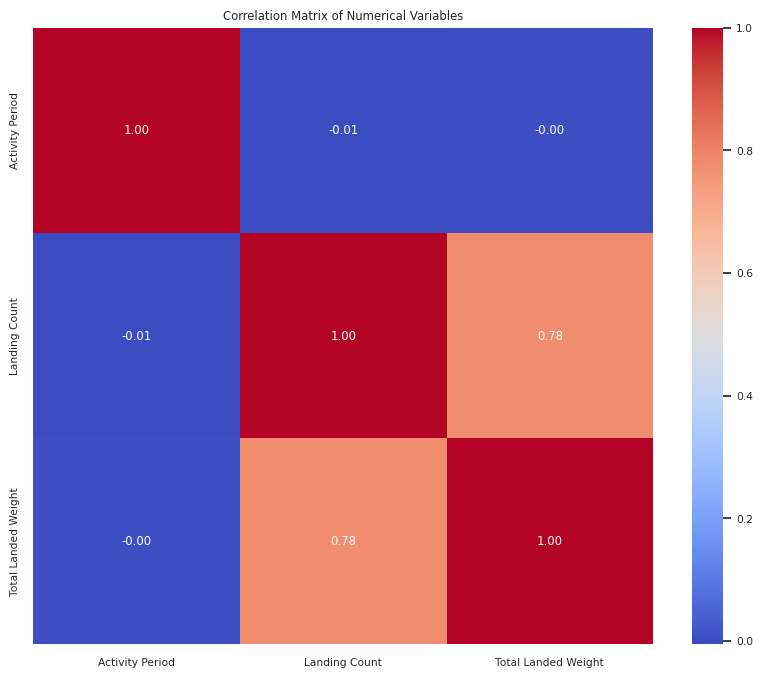

In [28]:
import seaborn as sns

numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute pairwise correlation of numerical columns
correlation_matrix = numerical_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


The heat Map computes and visualizes the correlation matrix of numerical variables in the DataFrame, providing insights into the relationships between different variables like Activity Period,Landing count ,Total Landed Weight. We can see high positive correlation between Landing Count and Total Landed Weight.

In [ ]:
#BONUS: You can create a histogram to show distribution of a numerical variable


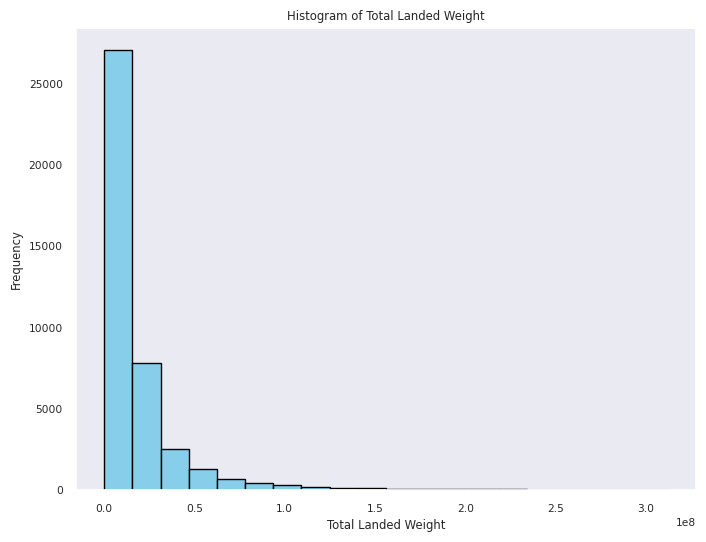

In [29]:
numerical_variable = "Total Landed Weight"

plt.figure(figsize=(8, 6))
df[numerical_variable].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of {}'.format(numerical_variable))
plt.xlabel(numerical_variable)
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The histogram shows that most airplanes landing in the US weigh between 0 and 10 million pounds. There is a secondary peak between 10 and 50 million pounds, and the distribution tails off to the right, with a few airplanes weighing more than 150 million pounds.

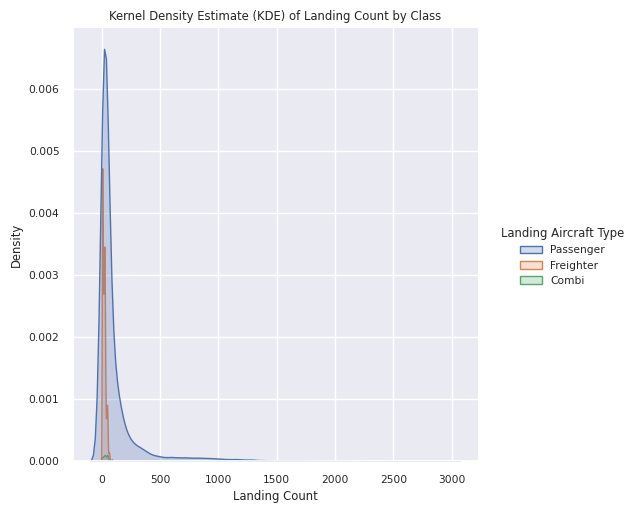

In [30]:
#BONUS: Include any other charts we learned in class on 01/30

import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df, x='Landing Count', kind='kde', hue='Landing Aircraft Type', fill=True)
plt.title('Kernel Density Estimate (KDE) of Landing Count by Class')
plt.show()


 The graph uses a KDE plot to visualize the distribution of the "Landing Count" variable, with the KDE curves colored based on the categories of the "Landing Aircraft Type" variable. This allows for the exploration of the distribution of landing counts across different types of aircraft.

## Aggregation of Categorical Data

In [31]:
#Create either a bar chart or pie chart of the sum of one numerical value in
#relation to one categorical variable (i.e. sum of sales for each category of product)

In [32]:
df["Landing Aircraft Type"].value_counts()

Passenger    35738
Freighter     5108
Combi          216
Name: Landing Aircraft Type, dtype: int64

In [33]:
Passenger = df[df["Landing Aircraft Type"]=="Passenger"]

print("There are",Passenger["Published Airline"].nunique(),"published airlines operating for passenger flights")

There are 120 published airlines operating for passenger flights


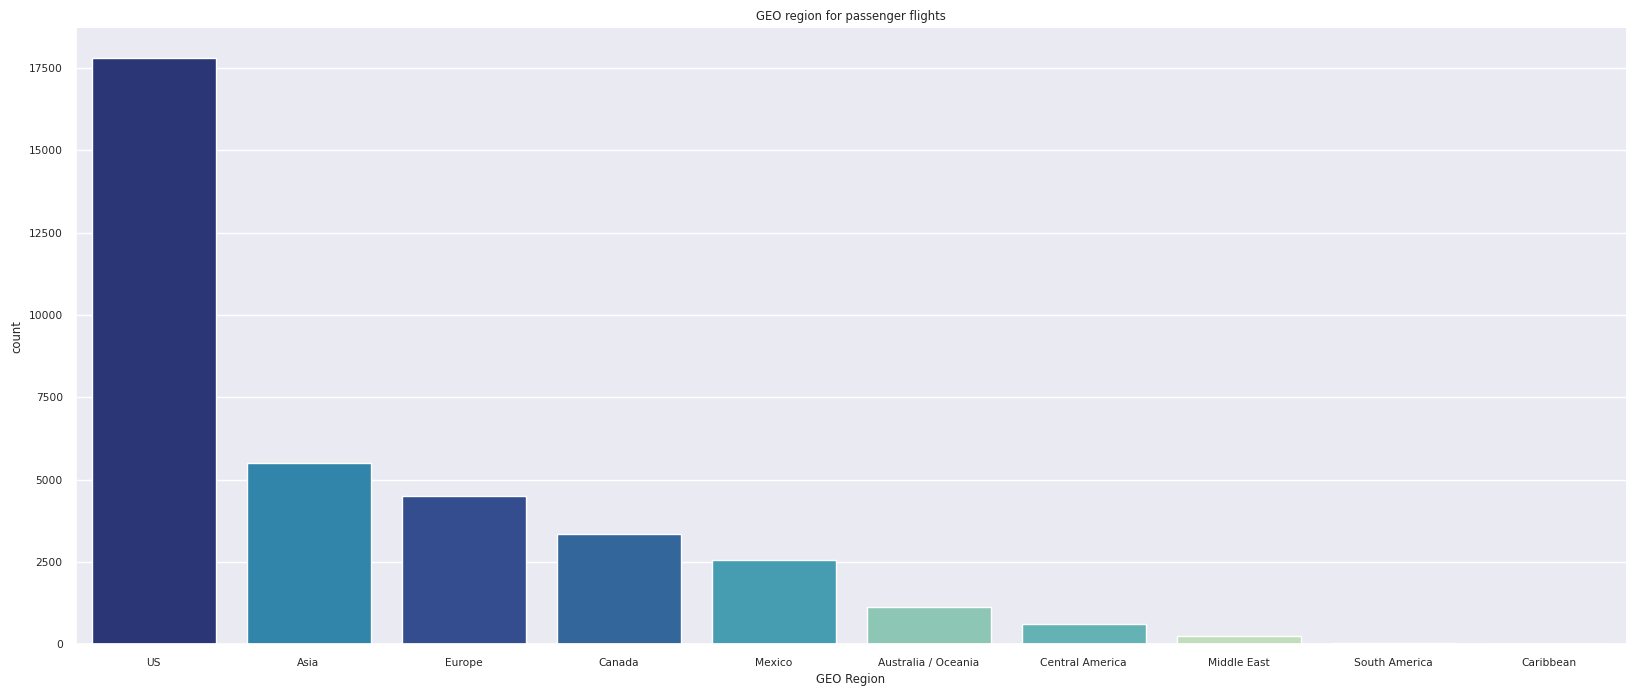

In [34]:
plt.figure(figsize=(20, 8))

# Plotting the countplot
sns.countplot(x="GEO Region",  hue="GEO Region", data=Passenger, order=Passenger["GEO Region"].value_counts().index, palette="YlGnBu_r", legend=False)

# Modifying the graph
plt.title("GEO region for passenger flights")
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

When analyzing passenger flights by GEO region, it's evident that domestic flights are the most frequent, followed by flights to Asia and Europe. Notably, neighboring North American countries, such as the United States, Canada, and Mexico, are also significant destinations. Grouping these countries into a single variable emphasizes the prominence of North American nations, particularly in comparison to regions consisting of multiple countries.






In [35]:
#BONUS: Create a scatterplot with more than 2 visual encodings
#BONUS: Include any other charts we learned in class on 01/30

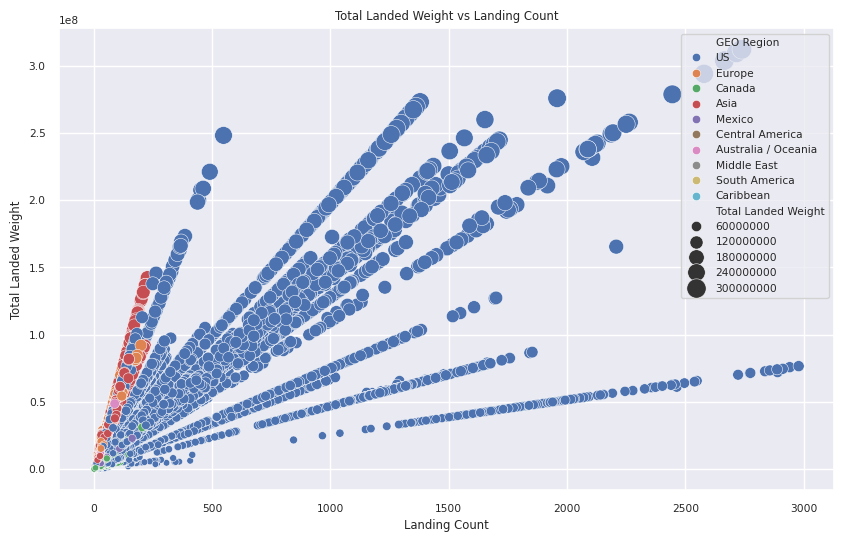

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot with multiple visual encodings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Landing Count', y='Total Landed Weight', hue='GEO Region', size='Total Landed Weight', sizes=(20, 200))

plt.title('Total Landed Weight vs Landing Count')
plt.xlabel('Landing Count')
plt.ylabel('Total Landed Weight')

plt.show()


The scatter plot shows the "Landing Count" variable on the x-axis, the "Total Landed Weight" variable on the y-axis, colors the points based on the "GEO Region" variable, and scales the size of the points based on the "Total Landed Weight" variable. We can see most of the Landings airplanes in SFO Airport are by Geo Region "US".

<Figure size 1000x600 with 0 Axes>

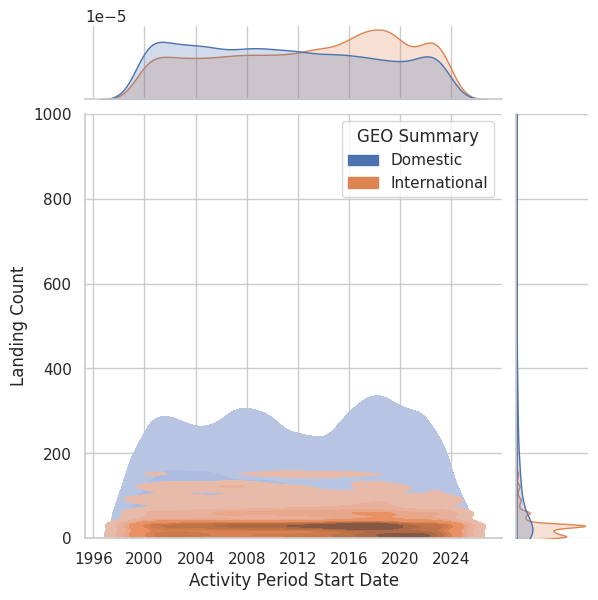

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

filtered_df = df[df['Landing Count'] <= 1000]

sns.jointplot(data=filtered_df, x='Activity Period Start Date', y='Landing Count', kind='kde', hue='GEO Summary', fill=True)

plt.ylim(0, 1000)

plt.show()


The graph shows a joint plot to visualize the relationship between the "Landing Count" and "Activity Period Start Date" variables. The KDE contours provide insight into the density of observations, and the colors indicate different categories of the "GEO Summary" variable.

The interpretations are as follows:

1.   The number of domestic flights is significantly higher than the number of international flights. This is likely due to the fact that there are simply more domestic flights overall, and because the SFO airport is located in a major metropolitan area with a lot of domestic traffic.
2.  The number of both domestic and international flights has been increasing steadily over time. This is likely due to a number of factors, including population growth, economic growth, and the increasing affordability of air travel.
3. There is a slight downward trend in the number of landings in the most recent years (2020-2024). This could be due to the impact of the COVID-19 pandemic on air travel.

## Insights & Trends

Here you can include some key conclusions you can make of your dataset based on
your analysis above. What visualizations do you hope to create based on what patterns you have observed in your dataset? What trends have you noticed that will help with your investigation into this topic?

### Trends from Air Traffic Passenger Statistics

*   SFO airport experiences the highest passenger traffic with the United States, followed by Europe, Asia, Canada, and Mexico, while Central America and South America contribute the lowest numbers.
*  At SFO Airport, the top five airlines that generate the highest passenger traffic are United Airlines, American Airlines, SkyWest Airlines, Delta Air Lines, and Southwest Airlines.
*  The number of passengers generally follows an increasing trend with a clear seasonal pattern, repeating approximately every year. The peak in traffic occurs during summertime, while the lowest point is in wintertime at the beginning of the year.
* We can infer that SFO is a busy airport with a growing number of passengers. However, the COVID-19 pandemic has had a significant impact on passenger numbers, and it is difficult to say what the long-term trend will be.

### Trends from Air Traffic Landing Statistics

* The dataset reveals insights into flight activities across diverse geographical regions, offering valuable information on travel patterns and destination preferences.
* Utilizing scatterplots with visual encodings, we can discern relationships between flight characteristics like "Landing Count" and "Total Landed Weight," considering factors such as "GEO Region" and "Landing Aircraft Type." Notably, SFO Airport sees a majority of landings from the "US" GEO Region.
* The joint plot with KDE visualization for "Landing Count" and "Activity Period Start Date" unveils temporal trends, aiding in identifying peak periods, seasonal variations, and scheduling trends.

### Visualizations for further insights:

* Stacked bar charts or area plots to compare flight activities by aircraft type and GEO region.
* Violin plots to analyze numerical variables like "Landing Count" and "Total Landed Weight" across different categories.
